In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load user data
users = pd.read_csv('../data/raw/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

# Load books data
books = pd.read_csv('../data/raw/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

# Load ratings data
ratings = pd.read_csv('../data/raw/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
D:\Program Files\anaconda3\envs\book-recommendation-system\lib\site-packag

In [3]:
print(users.head())
print()
print(books.head())
print()
print(ratings.head())

   userID                            Location   Age
0       1                  nyc, new york, usa   NaN
1       2           stockton, california, usa  18.0
2       3     moscow, yukon territory, russia   NaN
3       4           porto, v.n.gaia, portugal  17.0
4       5  farnborough, hants, united kingdom   NaN

         ISBN                                          bookTitle  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

             bookAuthor yearOfPublication                   publisher  \
0    Mark P. O. Morford              2002     Oxford University Press   
1  Richard Bruce Wright              2001       HarperFlamingo Canada   
2          Carlo D'Este              1991             Harpe

TypeError: '<=' not supported between instances of 'int' and 'str'

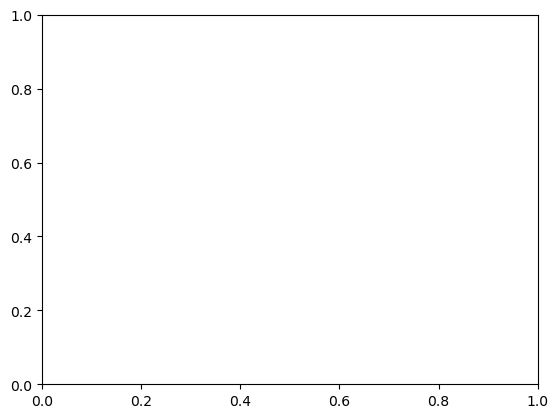

In [3]:
# Display basic statistics
print(users['Age'].describe())

# Plot a histogram
plt.hist(users['Age'].dropna(), bins=20, color='lightblue')
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

There are some entries with age '0' and even '250' this could be an error in the data and should be handled

In [5]:
# Calculate and print average rating
average_rating = ratings['bookRating'].mean()
max_rating = ratings['bookRating'].max()
print(f"The average book rating is: {round(average_rating)} out of {max_rating}")

The average book rating is: 3 out of 10


count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: bookRating, dtype: float64


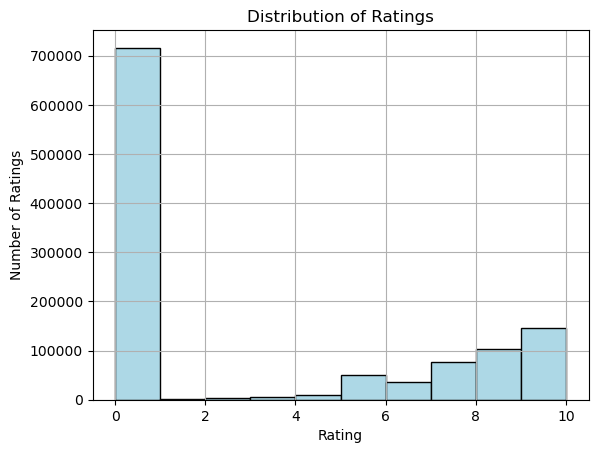

In [6]:
# Display basic statistics
print(ratings['bookRating'].describe())

# Plot a histogram
plt.hist(ratings['bookRating'], bins=10, color='lightblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

The distribution of ratings show that over 50% of the ratings go towards 0, this could mean that users interacted with the book but they didn't rate it. It's logical to have a rating between 1 and 10 so this might actually be the case.

Alternatively we could use this in the COLD START problem. Using a binary classification for whether a person would interact with a book or not. then using the rating for further recommendation after the first interaction.

count    46117.000000
mean         2.978832
std          1.784772
min          0.000000
25%          1.414214
50%          3.450328
75%          4.193974
max          7.071068
Name: bookRating, dtype: float64


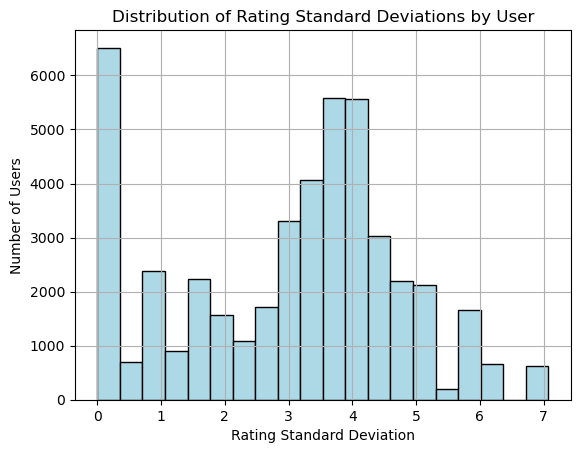

In [7]:
# Assuming 'ratings' dataframe is already defined
# Group the data by user and calculate the standard deviation of ratings
user_rating_std = ratings.groupby('userID')['bookRating'].std()

# Display basic statistics about the standard deviations
print(user_rating_std.describe())

# You may also wish to plot the distribution
user_rating_std.hist(bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Rating Standard Deviations by User')
plt.xlabel('Rating Standard Deviation')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

The fact that the distribution of standard deviations appears somewhat normal suggests that there are users with both high and low variability in their ratings, with the majority of users having moderate variability.

This analysis can help inform how to handle ratings in the recommendation system. For users with high consistency (low standard deviation), the system could potentially provide more personalized recommendations by taking into account the user's specific rating habits. On the other hand, for users with high variability in their ratings, it might be more beneficial to rely on general trends in the data, as predicting their exact rating for a given book could be more challenging.

N.B.: This should be considered when improving the system

Ratings per user:
count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: bookRating, dtype: float64


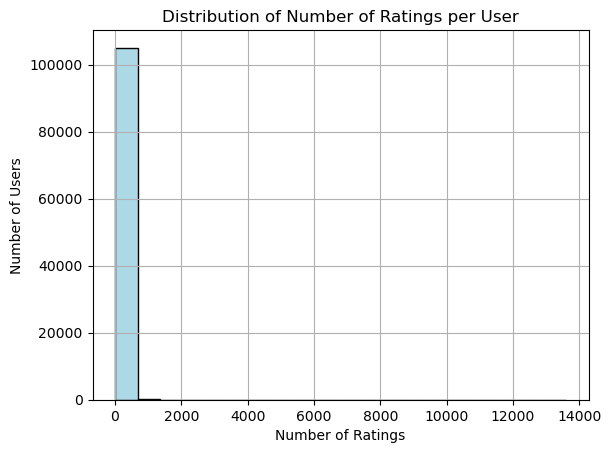


Ratings per book:
count    340556.000000
mean          3.376185
std          12.436252
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2502.000000
Name: bookRating, dtype: float64


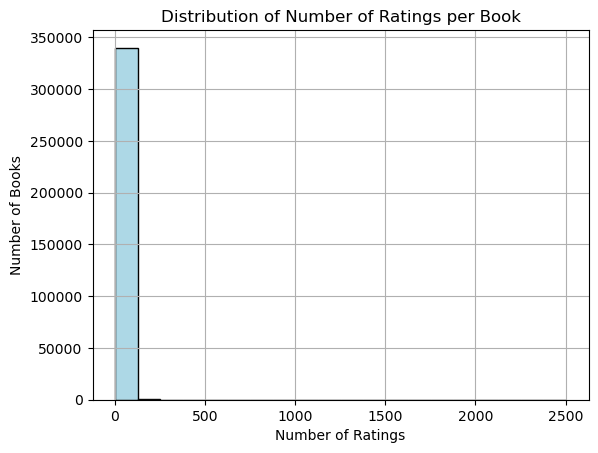

In [8]:
# Count the number of ratings per user
ratings_per_user = ratings.groupby('userID')['bookRating'].count()

# Display basic statistics
print("Ratings per user:")
print(ratings_per_user.describe())

# Plot a histogram
ratings_per_user.hist(bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Count the number of ratings per book
ratings_per_book = ratings.groupby('ISBN')['bookRating'].count()

# Display basic statistics
print("\nRatings per book:")
print(ratings_per_book.describe())

# Plot a histogram
ratings_per_book.hist(bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Number of Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()


In [9]:
# Assuming 'ratings' and 'books' dataframes are already defined
unique_users = ratings['userID'].nunique()
unique_books = books['ISBN'].nunique()

print(f"We have {unique_users} unique users and {unique_books} unique books.")

We have 105283 unique users and 271360 unique books.


This gives us a sense of the potential sparsity of our user-item interactions matrix, as we have a high number of users and books, but we'll need to cross-reference this with the total number of interactions (ratings) to fully understand the sparsity. A sparse matrix could lead to a situation known as the cold start problem, where it's harder to make recommendations due to the lack of data on user-item interactions.

The large number of unique users and books also indicates that we have a substantial amount of data at our disposal, which is generally beneficial for training machine learning models. The diversity of users and books could allow our model to learn a wide range of preferences and make personalized recommendations.

However, managing a dataset of this size also comes with its own challenges. We might need to consider using more efficient data structures, such as sparse matrices, to handle the data more efficiently. Also, we may need to implement batch processing for training the model if the entire dataset does not fit into memory.

The large number of unique books also implies that we have a long-tail distribution, which is common in recommendation systems. A small number of items (books) are very popular and have a lot of interactions, while a large number of items have very few interactions. This is something we will need to keep in mind when designing our recommendation system, as standard collaborative filtering methods can struggle with recommending items in the long tail. We might need to consider hybrid methods that can leverage both collaborative and content-based information to deal with this issue.

In [10]:
# Assuming 'users', 'books', and 'ratings' dataframes are already defined

# Count missing values in each dataframe
missing_users = users.isnull().sum()
missing_books = books.isnull().sum()
missing_ratings = ratings.isnull().sum()

# Print results
print("Missing values in Users dataframe:")
print(missing_users)
print("\nMissing values in Books dataframe:")
print(missing_books)
print("\nMissing values in Ratings dataframe:")
print(missing_ratings)


Missing values in Users dataframe:
userID           0
Location         0
Age         110762
dtype: int64

Missing values in Books dataframe:
ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
imageUrlS            0
imageUrlM            0
imageUrlL            3
dtype: int64

Missing values in Ratings dataframe:
userID        0
ISBN          0
bookRating    0
dtype: int64


In the Users dataframe, we have 110,762 missing values in the 'Age' column. Depending on the importance of age in our analysis, we may choose to fill these missing values with some form of imputation (like the mean, median, or a specified value), or we could choose to leave them as is. In some cases, missing data itself can be informative.

The 'imageUrlS', 'imageUrlM', and 'imageUrlL' columns also have missing values. Depending on whether or not these images are crucial to our recommendation system, we might handle these missing values differently. For instance, if images are not necessary, we might even decide to drop these columns.

In [14]:
# Find the books with missing 'bookAuthor' information
missing_authors = books[books['bookAuthor'].isnull()]
print("Books with missing authors:")
print(missing_authors)

# Find the books with missing 'publisher' information
missing_publishers = books[books['publisher'].isnull()]
print("\nBooks with missing publishers:")
print(missing_publishers)

Books with missing authors:
              ISBN                                          bookTitle  \
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   

       bookAuthor yearOfPublication                       publisher  \
187689        NaN              1995  Edinburgh Financial Publishing   

                                                imageUrlS  \
187689  http://images.amazon.com/images/P/9627982032.0...   

                                                imageUrlM  \
187689  http://images.amazon.com/images/P/9627982032.0...   

                                                imageUrlL  
187689  http://images.amazon.com/images/P/9627982032.0...  

Books with missing publishers:
              ISBN        bookTitle       bookAuthor yearOfPublication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae              2002   
129037  1931696993  Finders Keepers  Linnea Sinclair              2001   

       publisher                                          ima

In [20]:
missing_publishers

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
